In [1]:
import pandas as pd

In [2]:
#loading dataset
data = pd.read_csv('japan_auto_sales.csv')

In [3]:
#displaying the fisrt few rows
print (data.head())

   Year    Month Manufacturer        Model  Sales   Region
0  2018  October        Mazda          SUV   3316   Kansai
1  2024     July       Subaru        Sedan   4749   Tohoku
2  2020   August       Nissan  Convertible   2496   Kansai
3  2023   August       Subaru        Sedan   1948  Chugoku
4  2015      May       Subaru    Hatchback   2066  Shikoku


In [4]:
#displaying basic information about the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          5000 non-null   int64 
 1   Month         5000 non-null   object
 2   Manufacturer  5000 non-null   object
 3   Model         5000 non-null   object
 4   Sales         5000 non-null   int64 
 5   Region        5000 non-null   object
dtypes: int64(2), object(4)
memory usage: 234.5+ KB
None


In [5]:
#displaying summery stats of the dataset
print(data.describe(include='all'))

               Year     Month Manufacturer Model        Sales  Region
count   5000.000000      5000         5000  5000  5000.000000    5000
unique          NaN        12            5     5          NaN       8
top             NaN  February       Toyota   SUV          NaN  Tohoku
freq            NaN       449         1025  1021          NaN     656
mean    2017.050600       NaN          NaN   NaN  3030.267200     NaN
std        4.353462       NaN          NaN   NaN  1145.500033     NaN
min     2010.000000       NaN          NaN   NaN  1000.000000     NaN
25%     2013.000000       NaN          NaN   NaN  2027.750000     NaN
50%     2017.000000       NaN          NaN   NaN  3061.500000     NaN
75%     2021.000000       NaN          NaN   NaN  4011.500000     NaN
max     2024.000000       NaN          NaN   NaN  4999.000000     NaN


In [6]:
#data cleaning
#checking missing value
print(data.isnull().sum())

Year            0
Month           0
Manufacturer    0
Model           0
Sales           0
Region          0
dtype: int64


In [7]:
#checking duplicates
print(data.duplicated().sum())

0


**Basic Analysis**

In [8]:
#group by manufacturer and sum the sales
sales_by_manufacturer = data.groupby('Manufacturer')['Sales'].sum()

#dislplay group
print(sales_by_manufacturer)

Manufacturer
Honda     3088050
Mazda     3034567
Nissan    2991868
Subaru    2931589
Toyota    3105262
Name: Sales, dtype: int64


In [9]:
#group by region and sum the sales
sales_by_region = data.groupby('Region')['Sales'].sum()

#displaying the group
print(sales_by_region)

Region
Chubu       1983709
Chugoku     1761703
Hokkaido    1828107
Kansai      1980862
Kanto       1818283
Kyushu      1903477
Shikoku     1885819
Tohoku      1989376
Name: Sales, dtype: int64


**Data Visualizing**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

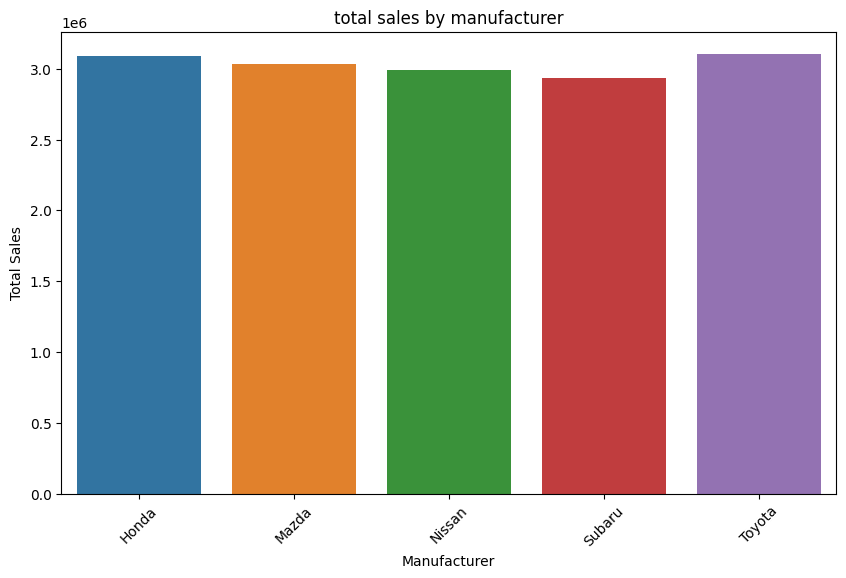

In [11]:
#creating a bar chart for sales by manufacturer

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_manufacturer.index,y=sales_by_manufacturer.values)
plt.xlabel('Manufacturer')
plt.ylabel('Total Sales')
plt.title('total sales by manufacturer')
plt.xticks(rotation=45)
plt.show()

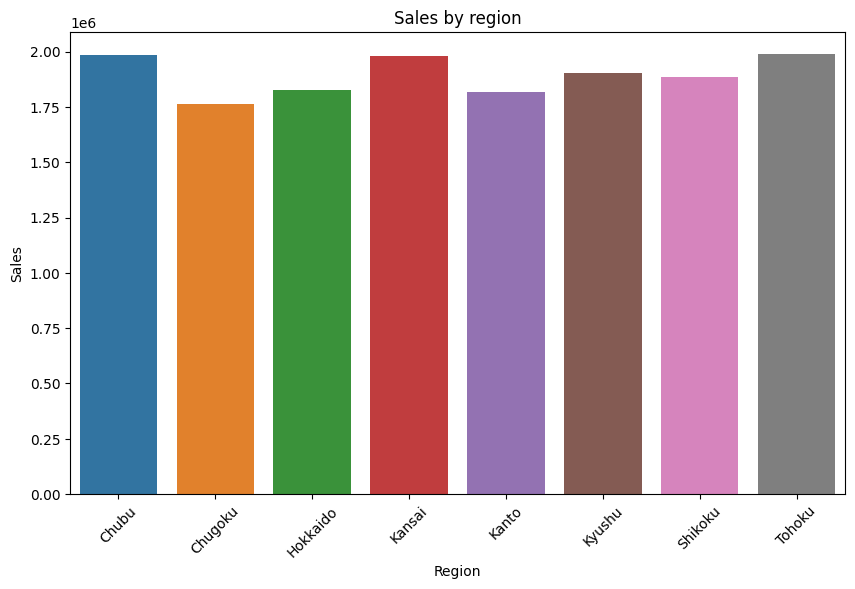

In [12]:
#visualizing bar chart for sales by region

plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values)
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Sales by region')
plt.xticks(rotation=45)
plt.show()

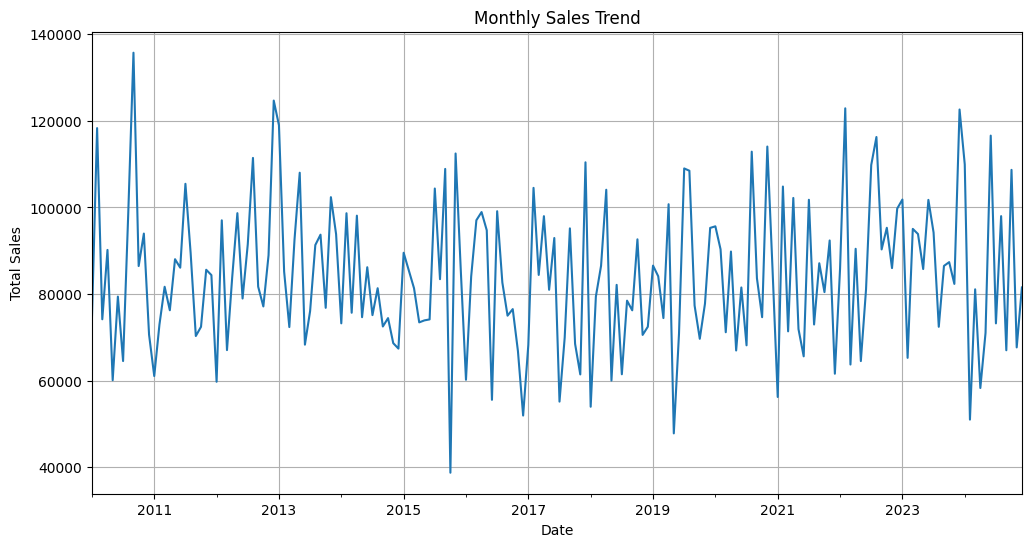

In [13]:
#converting 'Year' and 'Month' columns to date time object
data['Date'] = pd.to_datetime(data['Year'].astype(str) +' '+ data['Month'])

# Setting 'Date' as index
data.set_index('Date', inplace=True)

# Resampling the data by month and sum the sales
monthly_sales = data['Sales'].resample('M').sum()

# Plotting the monthly sales trend
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

**Sales analysis by Car Model**

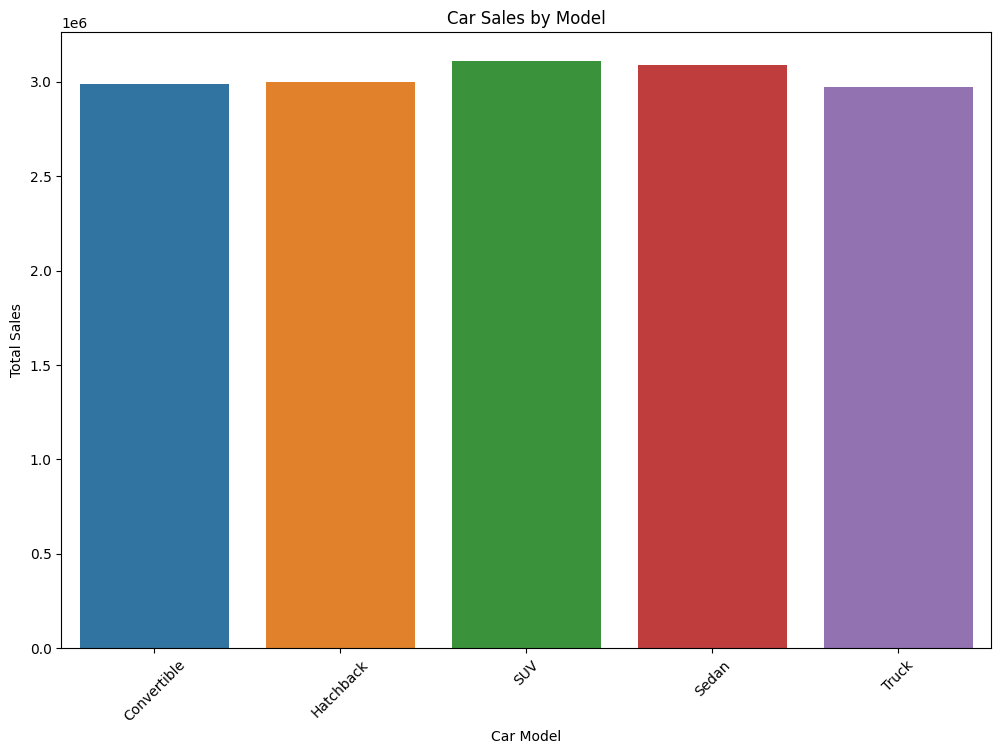

In [14]:
#grouping by model and summing the sales
sales_by_model = data.groupby('Model')['Sales'].sum()

#plotting the sales by model
plt.figure(figsize=(12,8))
sns.barplot(x=sales_by_model.index, y=sales_by_model.values)
plt.xlabel('Car Model')
plt.ylabel('Total Sales')
plt.title('Car Sales by Model')
plt.xticks(rotation = 45)
plt.show()

**Seasonal Analysis**

In [26]:
#!jupyter nbconvert --to pdf 'japan_auto_sales_analysis.ipynb'

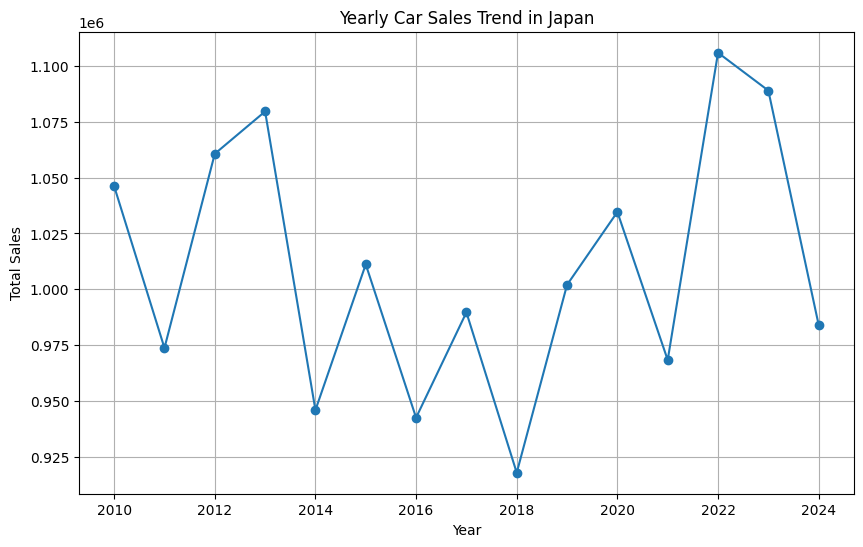

In [15]:
# Group by year and calculate the total sales
yearly_sales = data.groupby(data.index.year)['Sales'].sum()

# Plot yearly sales trend
plt.figure(figsize=(10,6))
plt.plot(yearly_sales, marker='o')
plt.title('Yearly Car Sales Trend in Japan')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


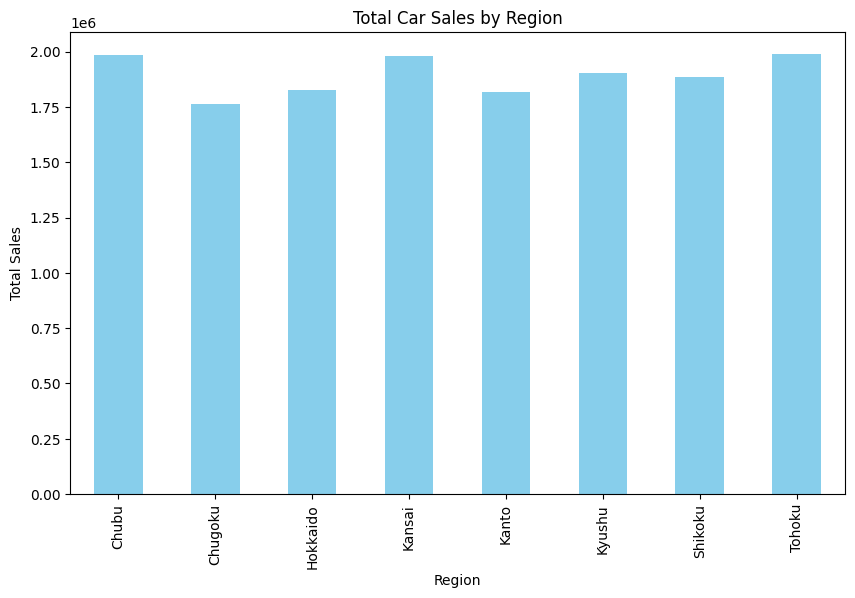

In [16]:
# Group by region and calculate total sales
region_sales = data.groupby('Region')['Sales'].sum()

# Plot sales by region
plt.figure(figsize=(10,6))
region_sales.plot(kind='bar', color='skyblue')
plt.title('Total Car Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()


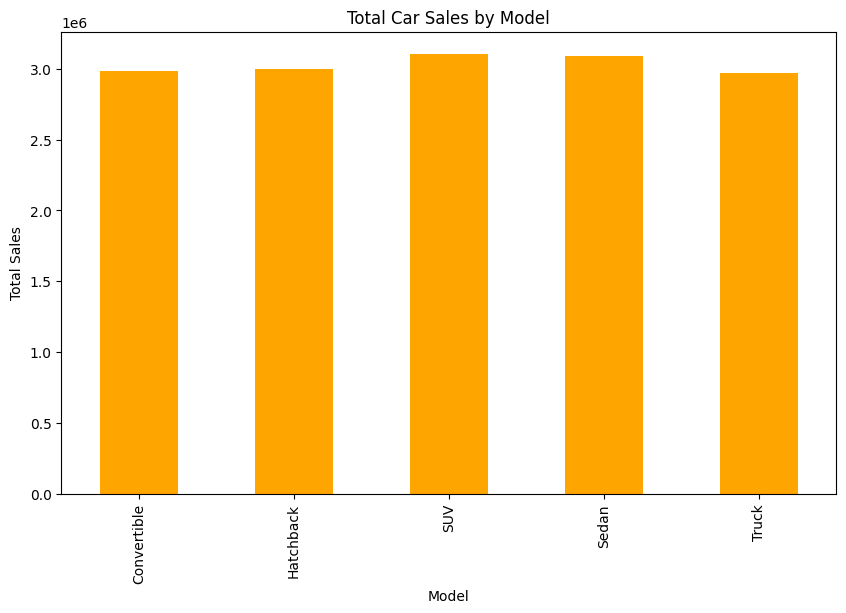

In [18]:
# Group by model (or the correct column) and calculate total sales
car_type_sales = data.groupby('Model')['Sales'].sum()

# Plot car type sales
plt.figure(figsize=(10,6))
car_type_sales.plot(kind='bar', color='orange')
plt.title('Total Car Sales by Model')
plt.xlabel('Model')
plt.ylabel('Total Sales')
plt.show()


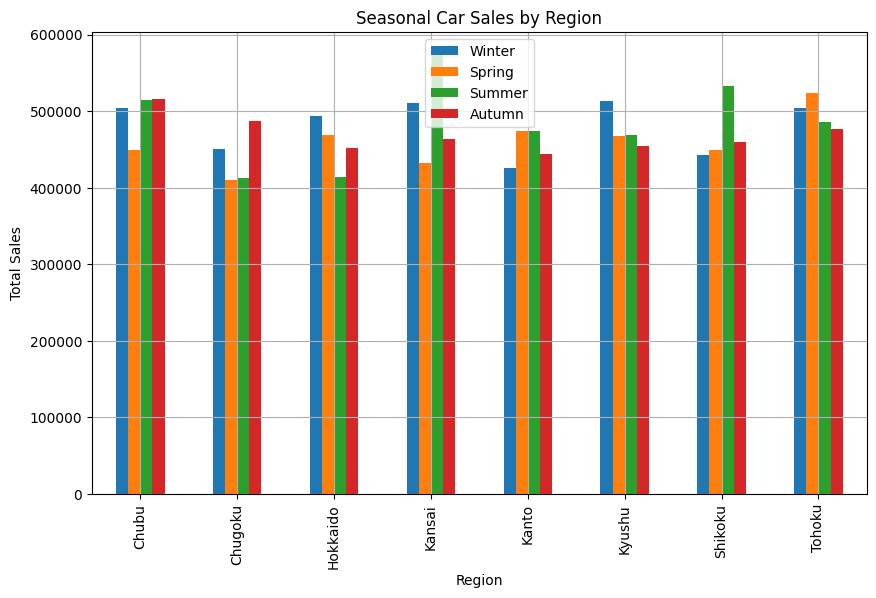

In [19]:
# Create season column
data['Season'] = data.index.month % 12 // 3 + 1

# Group by region and season
seasonal_region_sales = data.groupby(['Region', 'Season'])['Sales'].sum().unstack()

# Plot seasonal sales by region
seasonal_region_sales.plot(kind='bar', figsize=(10,6))
plt.title('Seasonal Car Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.legend(['Winter', 'Spring', 'Summer', 'Autumn'])
plt.grid(True)
plt.show()


In [20]:
# Get top 5 models per region
top_models_by_region = data.groupby(['Region', 'Model'])['Sales'].sum().groupby('Region').nlargest(5).reset_index(level=0, drop=True)

print(top_models_by_region)


Region    Model      
Chubu     Convertible    418519
          Hatchback      409696
          SUV            400223
          Sedan          382511
          Truck          372760
Chugoku   SUV            382958
          Truck          370688
          Convertible    354310
          Hatchback      339710
          Sedan          314037
Hokkaido  Convertible    407593
          SUV            369744
          Truck          368980
          Sedan          342063
          Hatchback      339727
Kansai    Truck          422126
          SUV            416117
          Sedan          399920
          Convertible    389381
          Hatchback      353318
Kanto     Sedan          466421
          Convertible    361145
          Hatchback      353035
          Truck          325855
          SUV            311827
Kyushu    Hatchback      447244
          Sedan          383773
          Truck          371612
          SUV            355658
          Convertible    345190
Shikoku   SUV     